<a href="https://colab.research.google.com/github/Aakarshnigam/Azure_Hotels-_Pricing_Strategy/blob/main/Azure_Hotels'_Pricing_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name** - **Aakarsh Nigam**

**Github Link** -

# Case Study
## Optimizing Hotel Room Pricing for Revenue Maximization


the dataset provided is a sample and may need to be modified or expanded to better suit the needs of the case study. The case aims to assess the solution development process. When in doubt, feel free to make assumptions based on general business considerations.
Business Context

*	Azure Hotels is a hospitality company with a chain of 50 hotels across 20 cities in the United States. They offer a range of rooms, from budget- friendly options to luxury suites.

*	Azure Hotels has a dynamic pricing strategy, where room prices are adjusted based on demand, competition, and other market factors. However, they want to optimize their pricing strategy to maximize revenue and profitability.

*	The company has collected data on room bookings, cancellations, and revenue for the past two years. They also have data on competitor pricing, seasonal demand, and other market trends.

*	Your task is to analyze the data and develop a pricing strategy that takes into account customer segmentation, demand forecasting, and competitor pricing.

*	The goal is to recommend a pricing strategy that maximizes revenue and profitability for Azure Hotels.



# Analysis Requirements
Analysis should include the following steps:
*	Customer Segment Analysis: Identify different customer segments based on their booking behaviour, demographics, and other relevant factors.
*	Pricing Drivers Identification: Analyze the factors that drive room pricing, including demand, and other factors which might deem fit.
*	Pricing Strategy Development: Develop a pricing strategy that takes into account customer segmentation and demand forecasting.
*	Impact Quantification: Quantify the expected impact of the recommended pricing strategy on revenue and profitability.



In [ ]:
# Importing the libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset
path = '/content/drive/MyDrive/Quantzig/Quantzig - Campus Hiring - DS Dataset 1.xlsx'
df = pd.read_excel(path)

In [ ]:
# First view of dataset as sample
df.sample(5)

hotel is_canceled  lead_time  arrival_date_year  \
90721    City Hotel   Cancelled         63               2022   
19799  Resort Hotel   Cancelled          2               2022   
63978    City Hotel      Stayed         44               2023   
48230    City Hotel      Stayed         45               2022   
42233    City Hotel   Cancelled         10               2021   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
90721               June                        24                          9   
19799            January                         1                          2   
63978           February                         8                         25   
48230              March                        12                         19   
42233          September                        36                          3   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
90721                        0                     1       2  ...   
19799                        0                     1       2  ...   
63978                        2                     1       3  ...   
48230                        1                     1       3  ...   
42233                        0                     3       2  ...   

       deposit_type  agent company days_in_waiting_list customer_type     adr  \
90721    No Deposit    9.0     NaN                    0     Transient  109.00   
19799    No Deposit  240.0     NaN                    0     Transient   66.00   
63978    No Deposit    9.0     NaN                    0     Transient  149.33   
48230    No Deposit    9.0     NaN                    0     Transient  131.40   
42233    No Deposit    9.0     NaN                    0      Contract  117.67   

       required_car_parking_spaces  total_of_special_requests  \
90721                            0                          1   
19799                            0                          1   
63978                            0                          0   
48230                            0                          1   
42233                            0                          1   

       reservation_status reservation_status_date  
90721           Check-Out              2016-06-10  
19799           Check-Out              2016-01-03  
63978            Canceled              2017-01-27  
48230            Canceled              2016-02-10  
42233           Check-Out              2015-09-06  

[5 rows x 32 columns]

In [ ]:
# Shape of dataset
df.shape

(119390, 32)

In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Features children, country, company and agent are having null values

In [ ]:
#Getting names of columns
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

### Column description



*   hotel: Hotel (H1 = Resort Hotel or H2 = City Hotel)

*   is_canceled: Value indicating if the booking was canceled (Cancelled) or not (Stayed)

* lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* arrival_date_year: Year of arrival date

* arrival_date_month: Month of arrival date

* arrival_date_week_number: Week number of the year for arrival date

* arrival_date_day_of_month: Day of arrival date

* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* adults: Number of adults

* children: Number of children

* babies: Number of babies

* meal: Type of meal booked. Categories: Undefined/SC (no meal package), BB (Bed & Breakfast), HB (Half board: breakfast and one other meal), FB (Full board: breakfast, lunch, dinner)

* country: Country of origin. Categories represented in ISO 3155–3:2013 format

* market_segment: Market segment designation. "TA" means "Travel Agents" and "TO" means "Tour Operators"

* distribution_channel: Booking distribution channel. "TA" means "Travel Agents" and "TO" means "Tour Operators"

* is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

* previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

* previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

* reserved_room_type: Code of room type reserved (anonymity reasons)

* assigned_room_type: Code of room type assigned to the booking, which may differ from the reserved room due to operations or customer requests (anonymity reasons)

* booking_changes: Number of changes made to the booking from the time it was entered to check-in or cancellation

* deposit_type: Indication of deposit status for booking: No Deposit, Non Refund, or Refundable

* agent: ID of the travel agency that made the booking (anonymity reasons)

* company: ID of the company responsible for the booking (anonymity reasons)

* days_in_waiting_list: Number of days the booking was on the waiting list before being confirmed to the customer

* customer_type: Type of booking: Contract (allotment or contract), Group, Transient (no group/contract), or Transient-party (transient with associated bookings)

* adr: Average Daily Rate calculated by dividing all lodging transactions by the total number of staying nights

* required_car_parking_spaces: Number of car parking spaces required by the customer

* total_of_special_requests: Number of special requests made by the customer (e.g., twin bed, high floor)

* reservation_status: Last reservation status: Canceled, Check-Out (guest departed), or No-Show (guest didn’t check in and didn’t inform)

* reservation_status_date: Date of the last status change, used with ReservationStatus




In [ ]:
#Checking for any duplicate value
df.duplicated().sum()

31994

There is 31994 duplicate values that need to be removed.

In [ ]:
#Viewing Duplicated values
df[df.duplicated()].head()

hotel is_canceled  lead_time  arrival_date_year  \
5    Resort Hotel   Cancelled         14               2021   
22   Resort Hotel   Cancelled         72               2021   
43   Resort Hotel   Cancelled         70               2021   
138  Resort Hotel      Stayed          5               2021   
200  Resort Hotel   Cancelled          0               2021   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
5                 July                        27                          1   
22                July                        27                          1   
43                July                        27                          2   
138               July                        28                          5   
200               July                        28                          7   

     stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
5                          0                     2       2  ...    No Deposit   
22                         2                     4       2  ...    No Deposit   
43                         2                     3       2  ...    No Deposit   
138                        1                     0       2  ...    No Deposit   
200                        0                     1       1  ...    No Deposit   

     agent company days_in_waiting_list customer_type     adr  \
5    240.0     NaN                    0     Transient   98.00   
22   250.0     NaN                    0     Transient   84.67   
43   250.0     NaN                    0     Transient  137.00   
138  240.0     NaN                    0     Transient   97.00   
200  240.0     NaN                    0     Transient  109.80   

     required_car_parking_spaces  total_of_special_requests  \
5                              0                          1   
22                             0                          1   
43                             0                          1   
138                            0                          0   
200                            0                          3   

     reservation_status reservation_status_date  
5             Check-Out              2015-07-03  
22            Check-Out              2015-07-07  
43            Check-Out              2015-07-07  
138            Canceled              2015-07-01  
200           Check-Out              2015-07-08  

[5 rows x 32 columns]

In [ ]:
#Removing duplicate values
df.drop_duplicates(inplace = True)

Dataset having 31994 duplicate values and those are successfully removed

In [ ]:
#Checking for any duplicate values
df.duplicated().sum()

0

In [ ]:
#Shape of Updated Dataset
df.shape

(87396, 32)

In [ ]:
# Checking for null values in columns
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
reservation_status_date               0
dtype: int64

Null values for the features :  children, country, agent, and company are 4, 452, 12193, and 82137 respectively.

In [ ]:
# Checking for percentage of null values in columns
Null_percent = df.isnull().sum()/len(df)*100
Null_percent = pd.DataFrame(Null_percent.apply(lambda x: str(round(x, 3)) + '%'),columns = ['Percentage of missing values'])
Null_percent

Percentage of missing values
hotel                                                  0.0%
is_canceled                                            0.0%
lead_time                                              0.0%
arrival_date_year                                      0.0%
arrival_date_month                                     0.0%
arrival_date_week_number                               0.0%
arrival_date_day_of_month                              0.0%
stays_in_weekend_nights                                0.0%
stays_in_week_nights                                   0.0%
adults                                                 0.0%
children                                             0.005%
babies                                                 0.0%
meal                                                   0.0%
country                                              0.517%
market_segment                                         0.0%
distribution_channel                                   0.0%
is_repeated_guest                                      0.0%
previous_cancellations                                 0.0%
previous_bookings_not_canceled                         0.0%
reserved_room_type                                     0.0%
assigned_room_type                                     0.0%
booking_changes                                        0.0%
deposit_type                                           0.0%
agent                                               13.951%
company                                             93.983%
days_in_waiting_list                                   0.0%
customer_type                                          0.0%
adr                                                    0.0%
required_car_parking_spaces                            0.0%
total_of_special_requests                              0.0%
reservation_status                                     0.0%
reservation_status_date                                0.0%

Children, country, agent, and company variables have null values of 0.0046%, 0.5172%, 13.9514%, and 93.9826%, respectively. Variable companies having more than 50% null values

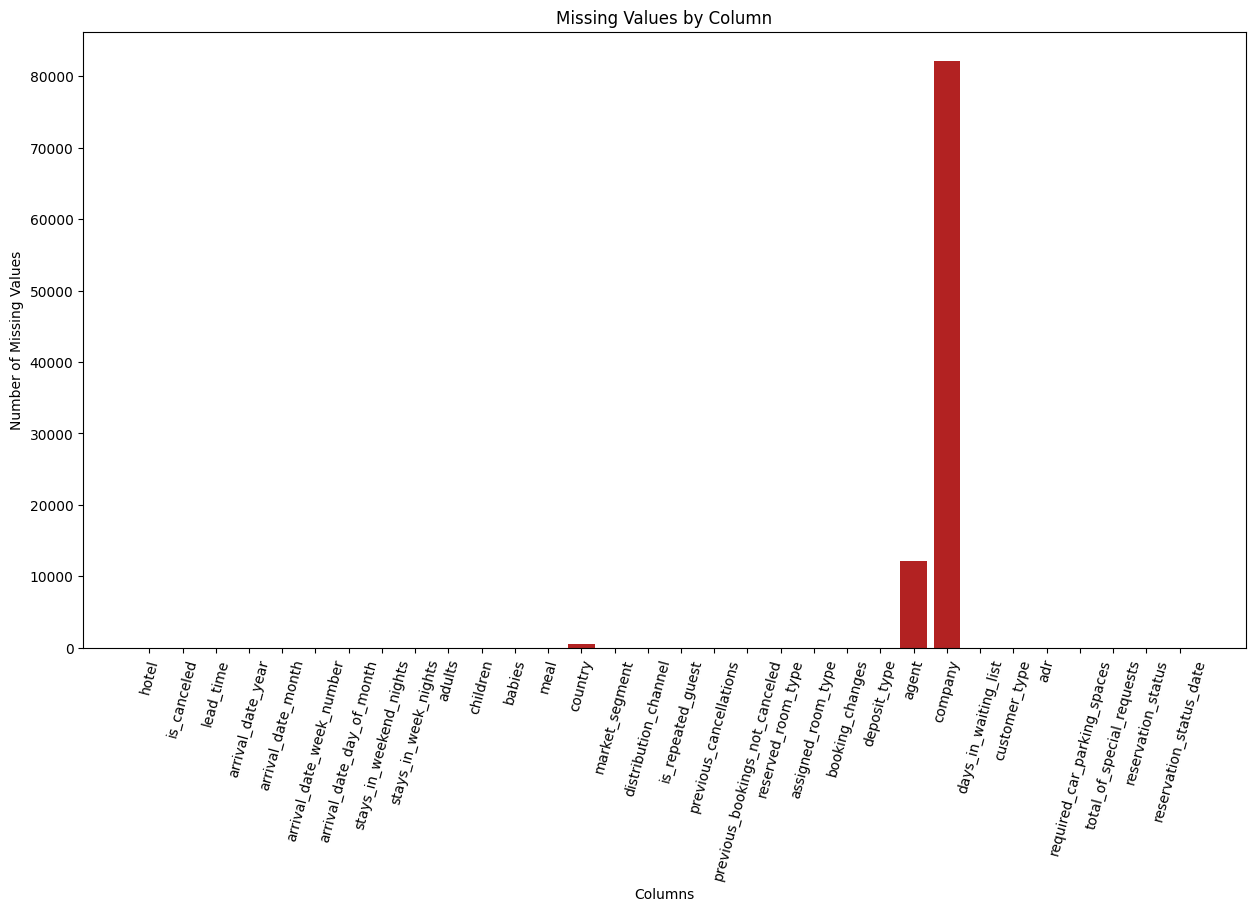

In [ ]:
#Visualizing missing Values
missing_values = df.isnull().sum()

# Create a bar plot to visualize missing values
plt.figure(figsize=(15, 8))
plt.bar(missing_values.index, missing_values, color='Firebrick')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column')
plt.xticks(rotation=75)  # Rotating x-axis labels for better readability
plt.show()

In [ ]:
# Removing null values that are more than 50%
df.drop(columns='company', inplace = True)

In [ ]:
#Removing missing rows from Children nad Country columns
df= df.dropna(subset = ['children','country'])

In [ ]:
# Replacing null values in agent with 0 assuming the null value indicates the booking has been done at reception
df['agent']= df['agent'].fillna(0)

<ipython-input-19-16cf51aa0050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent']= df['agent'].fillna(0)


In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

### Understanding Variables

In [ ]:
#describing Statical Data
df.describe(include ='all').T

count unique         top   freq  \
hotel                             86940      2  City Hotel  53418   
is_canceled                       86940      2   Cancelled  62953   
lead_time                       86940.0    NaN         NaN    NaN   
arrival_date_year               86940.0    NaN         NaN    NaN   
arrival_date_month                86940     12      August  11232   
arrival_date_week_number        86940.0    NaN         NaN    NaN   
arrival_date_day_of_month       86940.0    NaN         NaN    NaN   
stays_in_weekend_nights         86940.0    NaN         NaN    NaN   
stays_in_week_nights            86940.0    NaN         NaN    NaN   
adults                          86940.0    NaN         NaN    NaN   
children                        86940.0    NaN         NaN    NaN   
babies                          86940.0    NaN         NaN    NaN   
meal                              86940      5          BB  67562   
country                           86940    177         PRT  27449   
market_segment                    86940      7   Online TA  51543   
distribution_channel              86940      5       TA/TO  69028   
is_repeated_guest               86940.0    NaN         NaN    NaN   
previous_cancellations          86940.0    NaN         NaN    NaN   
previous_bookings_not_canceled  86940.0    NaN         NaN    NaN   
reserved_room_type                86940     10           A  56189   
assigned_room_type                86940     12           A  46151   
booking_changes                 86940.0    NaN         NaN    NaN   
deposit_type                      86940      3  No Deposit  85796   
agent                           86940.0    NaN         NaN    NaN   
days_in_waiting_list            86940.0    NaN         NaN    NaN   
customer_type                     86940      4   Transient  71573   
adr                             86940.0    NaN         NaN    NaN   
required_car_parking_spaces     86940.0    NaN         NaN    NaN   
total_of_special_requests       86940.0    NaN         NaN    NaN   
reservation_status                86940      3   Check-Out  62953   
reservation_status_date           86940    NaN         NaN    NaN   

                                                         mean  \
hotel                                                     NaN   
is_canceled                                               NaN   
lead_time                                           80.193375   
arrival_date_year                                 2022.211824   
arrival_date_month                                        NaN   
arrival_date_week_number                            26.841477   
arrival_date_day_of_month                           15.818024   
stays_in_weekend_nights                              1.007396   
stays_in_week_nights                                 2.628744   
adults                                               1.878525   
children                                             0.139211   
babies                                               0.010835   
meal                                                      NaN   
country                                                   NaN   
market_segment                                            NaN   
distribution_channel                                      NaN   
is_repeated_guest                                    0.039234   
previous_cancellations                               0.030228   
previous_bookings_not_canceled                       0.176708   
reserved_room_type                                        NaN   
assigned_room_type                                        NaN   
booking_changes                                      0.271854   
deposit_type                                              NaN   
agent                                                 81.1121   
days_in_waiting_list                                 0.753497   
customer_type                                             NaN   
adr                                                106.574804   
requi

I found out that the Adr in some of the rows is a -VE value which cannot happen in real life situation so the data is not relevant in that particular rows. We can drop or impute values in those rows and for this we will be imputing mean values in those rows.

In [ ]:
mean_value = df.loc[df['adr']>=0,'adr'].mean()    # mean excluding -ve values in ADR

df.loc[df['adr']<0 , 'adr'] = mean_value          # replacing incorrect -VE  values with mean Value of ADR

In [ ]:
# Updated dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Mearging and making new columns and deleting the old ones**

In [ ]:
# Adding night stays on week night and weekend night in one variable to 'total_stays'
df['total_stays']=df['stays_in_weekend_nights']+ df['stays_in_week_nights']

# Converting "adults," "children," and "babies" to total_people by adding it
df['total_people']= df['adults']+ df['children']+ df['babies']

# Creating 'total_childrens' variable by adding 'chldrens' and 'babies' variables
df['total_childrens']= df['children']+ df['babies']

# Creating 'reserved_room_assigned' variable which describe same room assigned or not
df['reserved_room_assigned']=np.where(df['reserved_room_type']==df['assigned_room_type'], 'yes', 'no')

# Creating 'lead_time_category' from 'lead_time' variale to display category
df['lead_time_category']=np.where(df['lead_time']<=15, 'low',
                                 np.where((df['lead_time']>15) & (df['lead_time']<90), 'medium', 'high'))

# Creating 'guest_category' from variable 'total_people'
df['guest_category']=np.where(df['total_people']==1, 'single',
                                 np.where(df['total_people']==2, 'couple', 'family'))

#Creating a new column where country codes

# Count occurrences of each unique country code
country_counts = df['country'].value_counts()

# Create a new column where country codes with fewer than 50 occurrences are replaced with 'OTHER'
df['country'] = df['country'].apply(lambda x: 'OTHER' if country_counts[x] < 100 else x)

# Count the values in the new column
new_country_counts = df['country'].value_counts()

df = df.drop(['stays_in_weekend_nights', 'stays_in_week_nights','adults','children','babies'], axis =1)

## Detecting multicollinearity and ouliers


<Axes: >

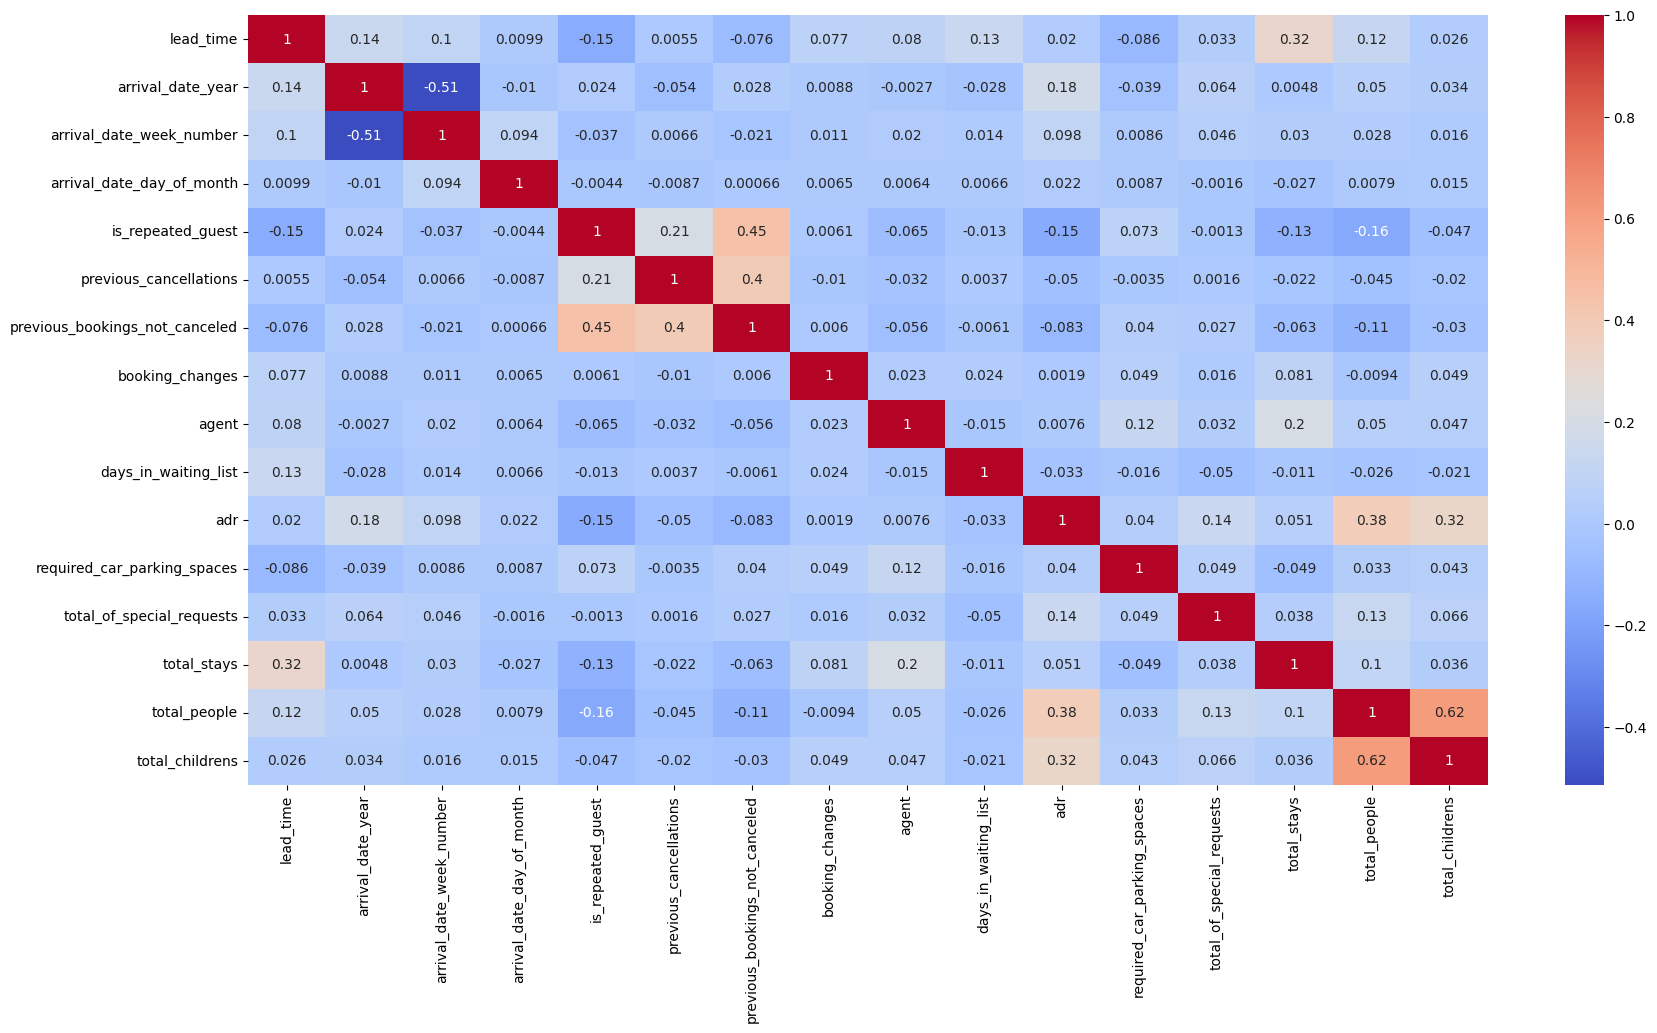

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "coolwarm")

**Insights:**
There is no high correlation between two columns which will lead to multicolinearity among them

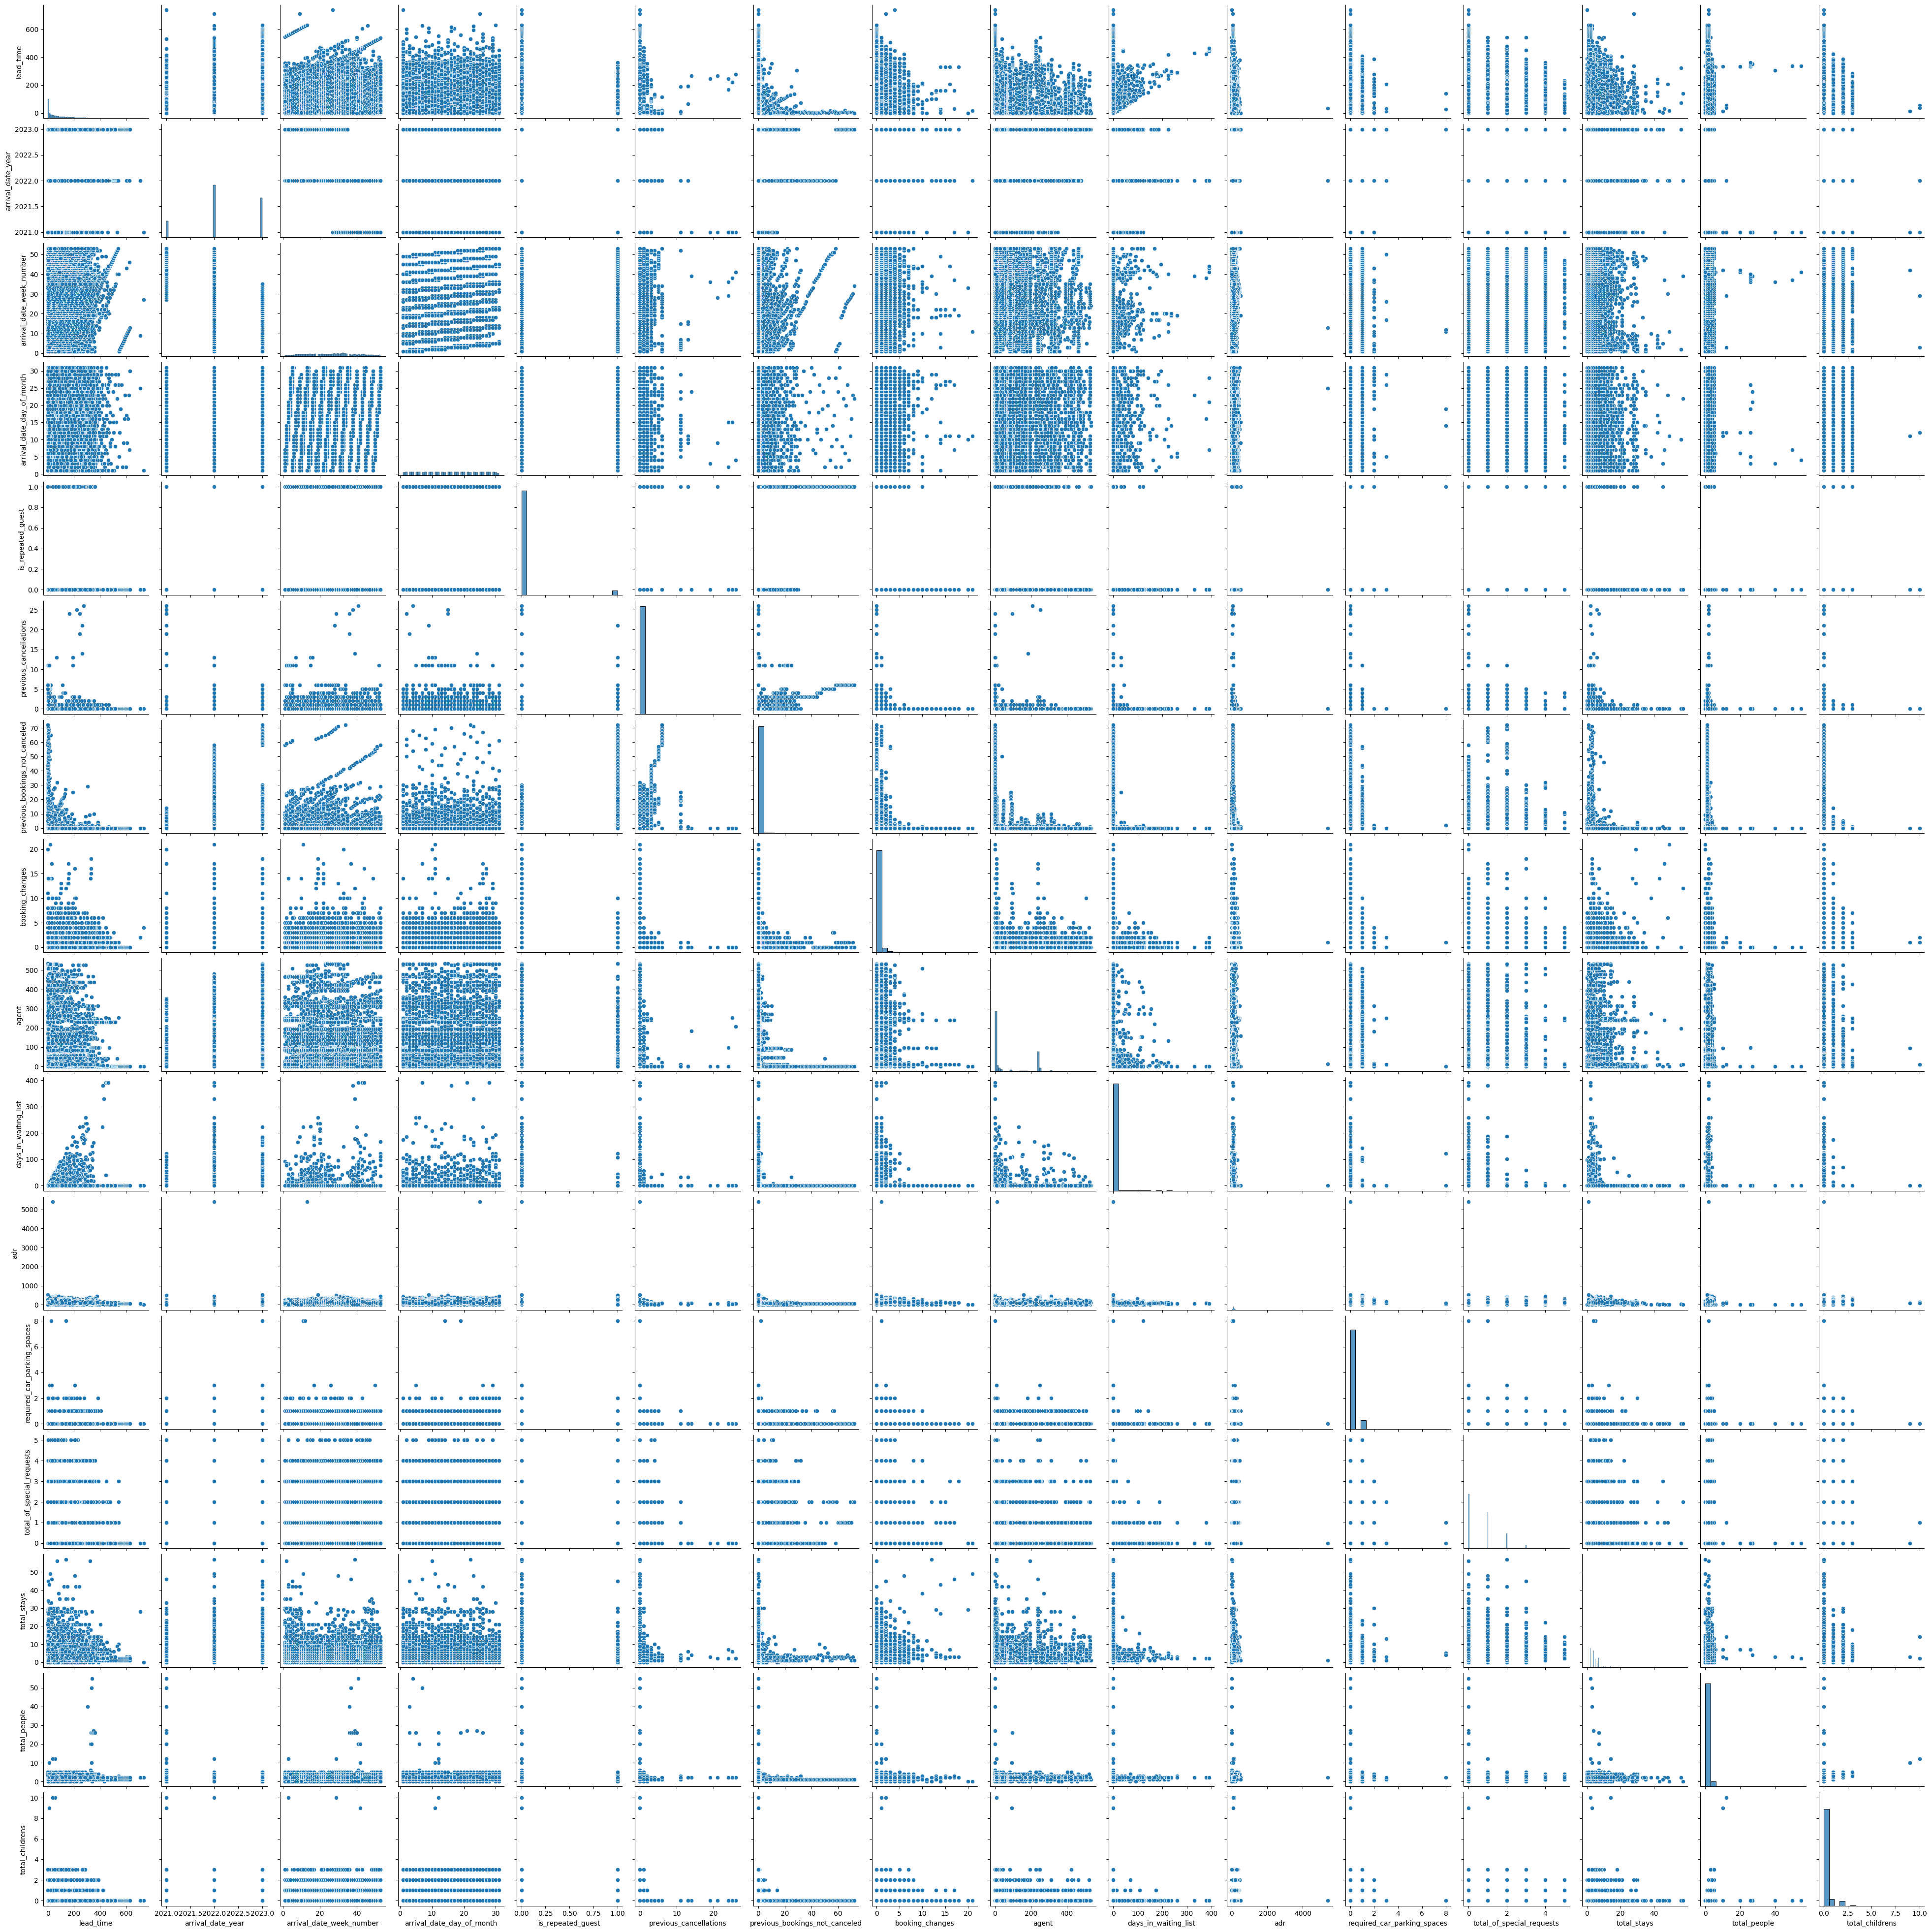

In [ ]:
sns.pairplot(df)

### **There seem to be outliers in :->**

**Lead Time:** Outliers may be present in lead time, indicating unusually long or short booking windows.

**Average Daily Rate (ADR):** Outliers in ADR might represent exceptionally high or low pricing.

**Required Car Parking Spaces:** Extreme values in this column could suggest unusual parking needs.

**Days in Waiting List:** Outliers here might indicate unusually long or short wait times for reservations.

**Total Children:** Unexpectedly high or low values could suggest errors in data entry or unusual family sizes.

**Total People:** Outliers might indicate errors in data entry or unusually large booking groups.

**Total Stays:** Extreme values could suggest unusually long or short stays.

**Total Special Requests:** Outliers might indicate unusual service requests.

**Days in Waiting List:** As with the previous point, outliers could indicate unusually long or short wait times.

### Combining columns and removing old ones

### Detecting outliars and Using Inter Quartile range for removing outliers


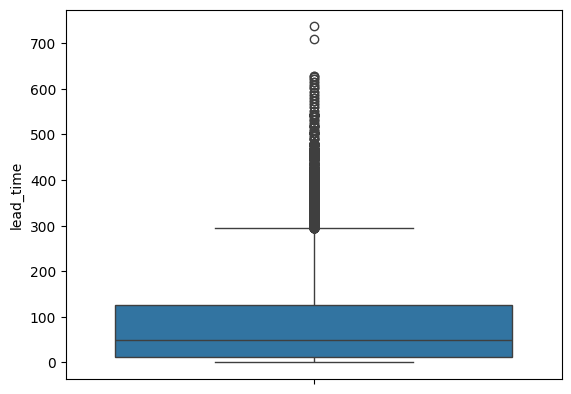

<Figure size 500x500 with 0 Axes>

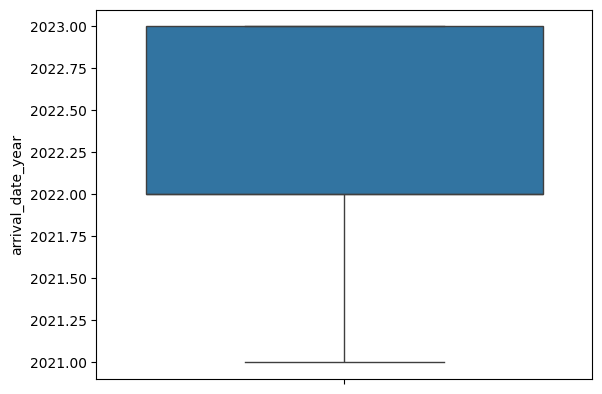

<Figure size 500x500 with 0 Axes>

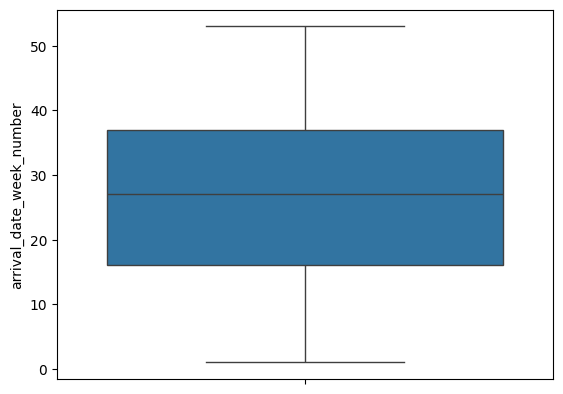

<Figure size 500x500 with 0 Axes>

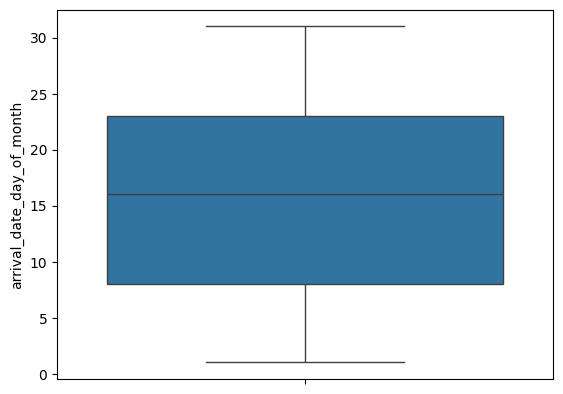

<Figure size 500x500 with 0 Axes>

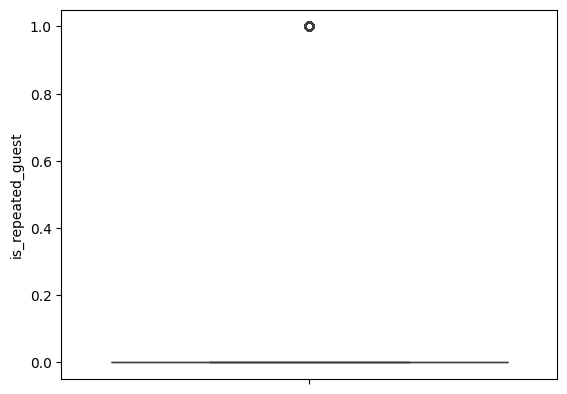

<Figure size 500x500 with 0 Axes>

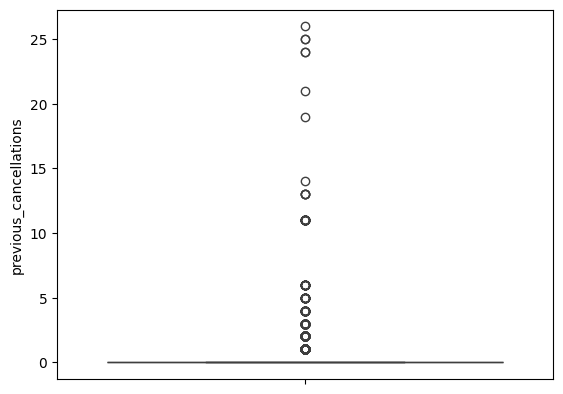

<Figure size 500x500 with 0 Axes>

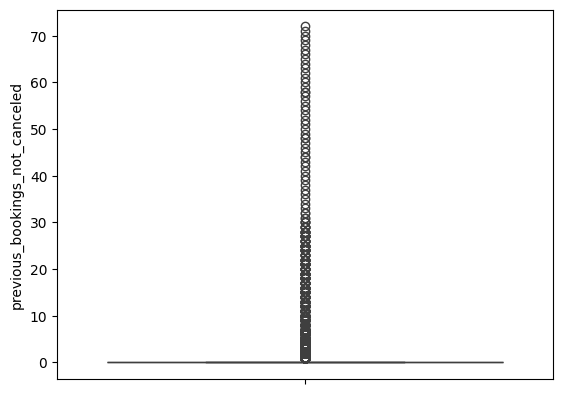

<Figure size 500x500 with 0 Axes>

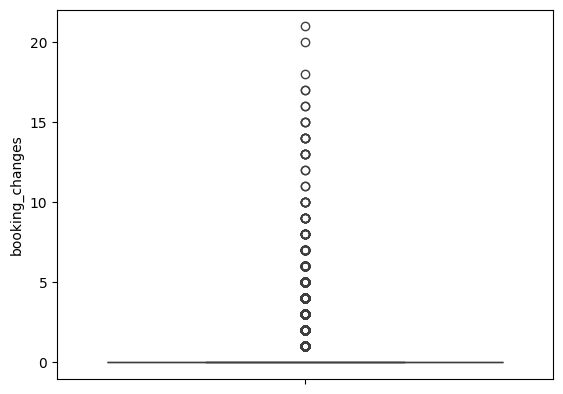

<Figure size 500x500 with 0 Axes>

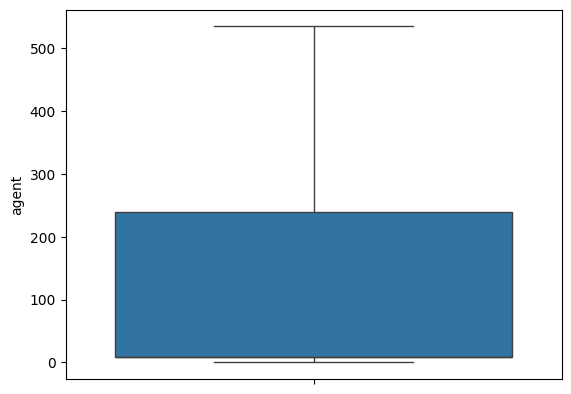

<Figure size 500x500 with 0 Axes>

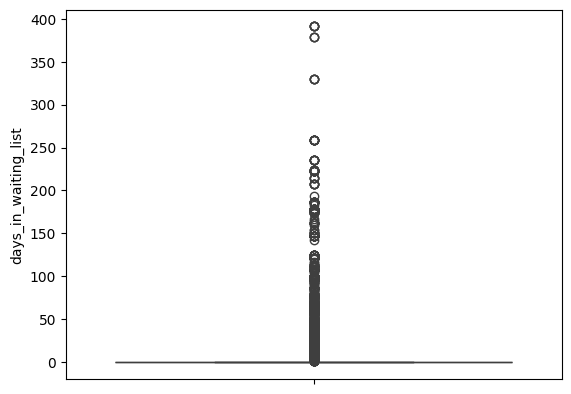

<Figure size 500x500 with 0 Axes>

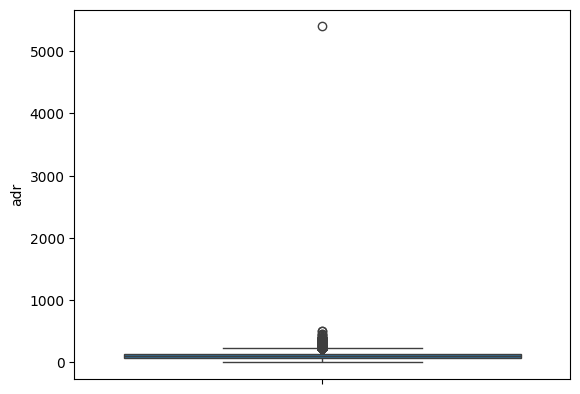

<Figure size 500x500 with 0 Axes>

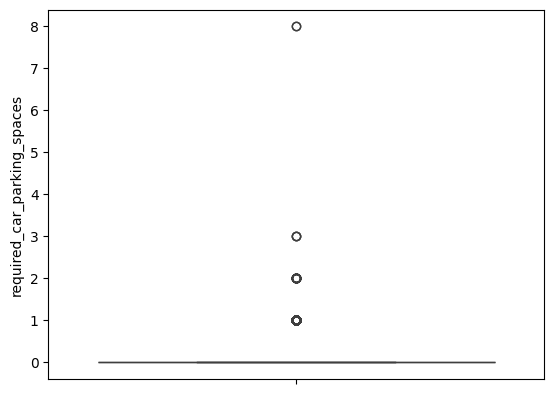

<Figure size 500x500 with 0 Axes>

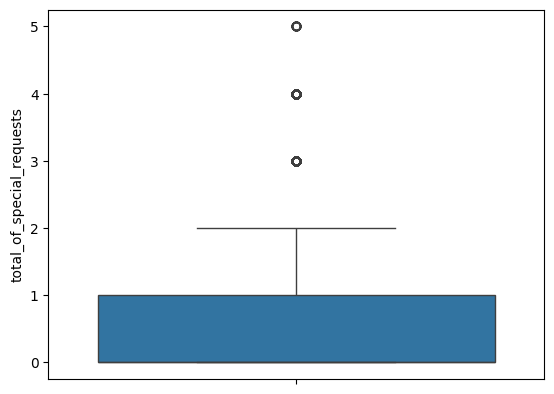

<Figure size 500x500 with 0 Axes>

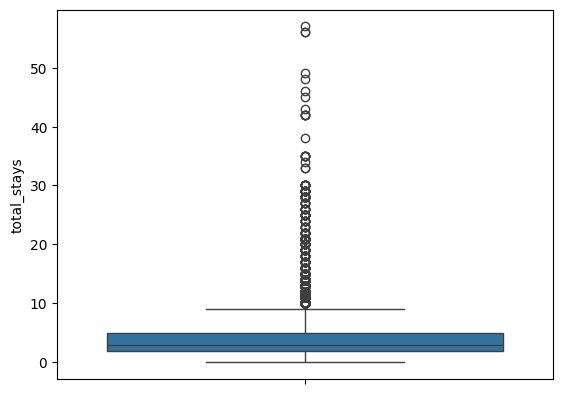

<Figure size 500x500 with 0 Axes>

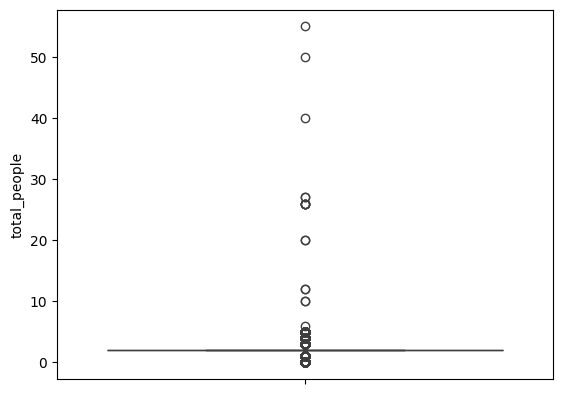

<Figure size 500x500 with 0 Axes>

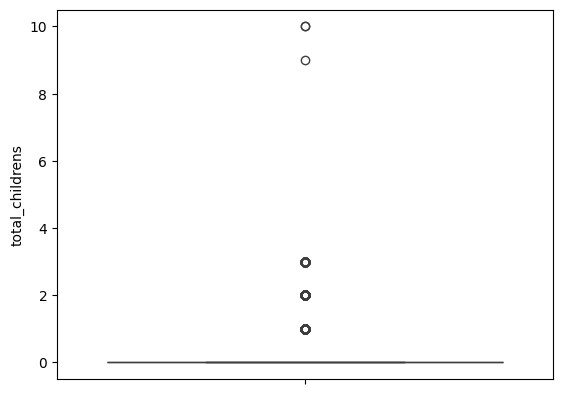

<Figure size 500x500 with 0 Axes>

In [ ]:
# Checking for outliers in all numeric columns
outliers_columns = df.select_dtypes(include=np.number).columns

for i in outliers_columns:
  if df[i].dtype == 'object':
    continue
  sns.boxplot(df[i])
  plt.figure(figsize=(5, 5))
  plt.show()

In [ ]:
# Using Inter Quartile range in skew symmetric curve for removing outliers
new_outliers_columns= ['lead_time','adr', 'required_car_parking_spaces','days_in_waiting_list','total_childrens','total_people', 'total_stays',
       'total_of_special_requests','days_in_waiting_list']

for i in new_outliers_columns:
    #Findng IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining lower and upper limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

<ipython-input-26-579308a5dee3>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '294.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[i] > upper_limit),i] = upper_limit
<ipython-input-26-579308a5dee3>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '9.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[i] > upper_limit),i] = upper_limit
<ipython-input-26-579308a5dee3>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[i] > upper_limit),i] = upper_limit


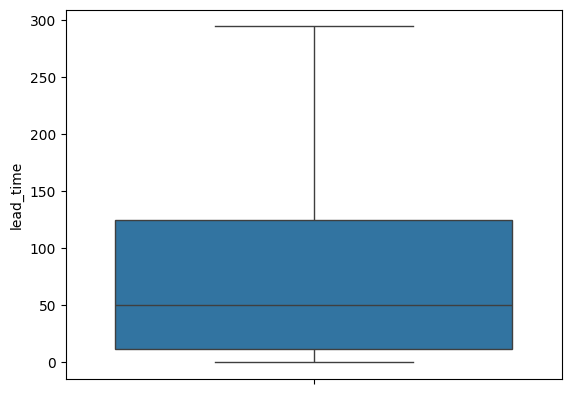

<Figure size 500x500 with 0 Axes>

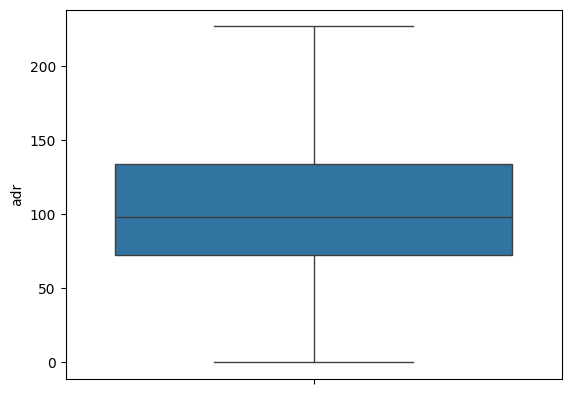

<Figure size 500x500 with 0 Axes>

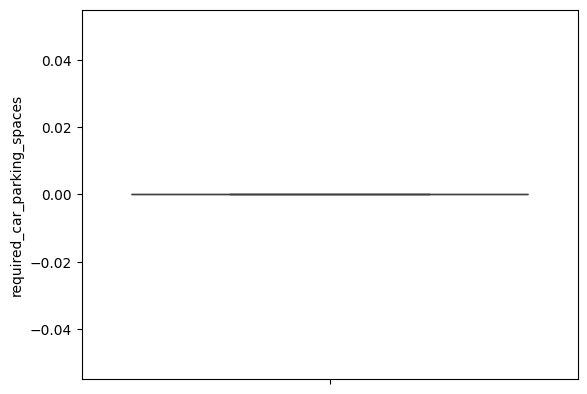

<Figure size 500x500 with 0 Axes>

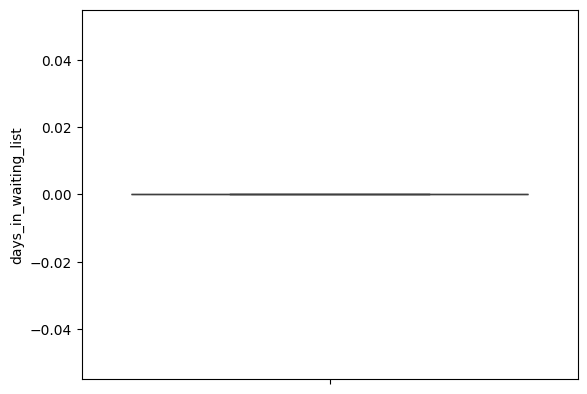

<Figure size 500x500 with 0 Axes>

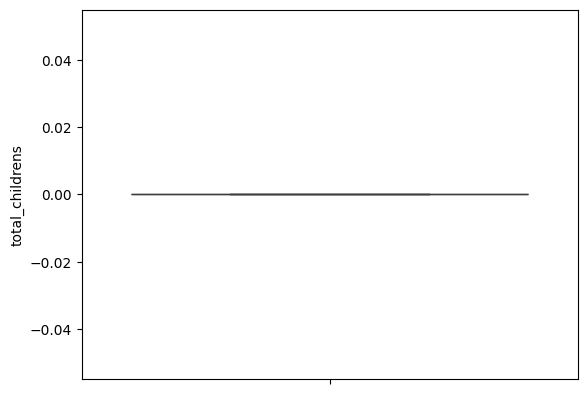

<Figure size 500x500 with 0 Axes>

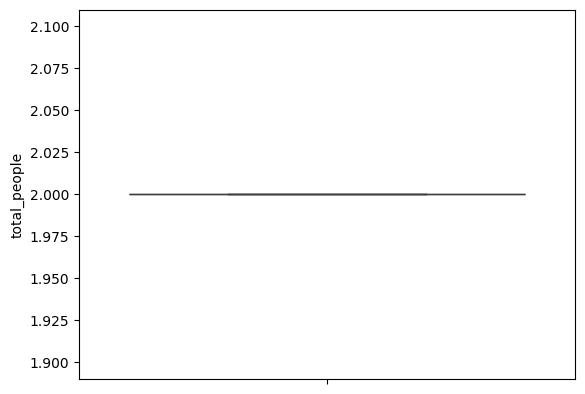

<Figure size 500x500 with 0 Axes>

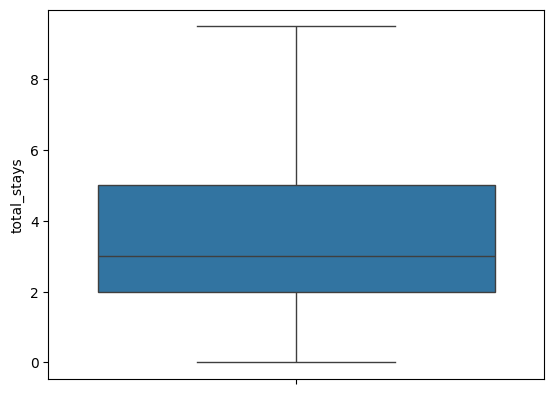

<Figure size 500x500 with 0 Axes>

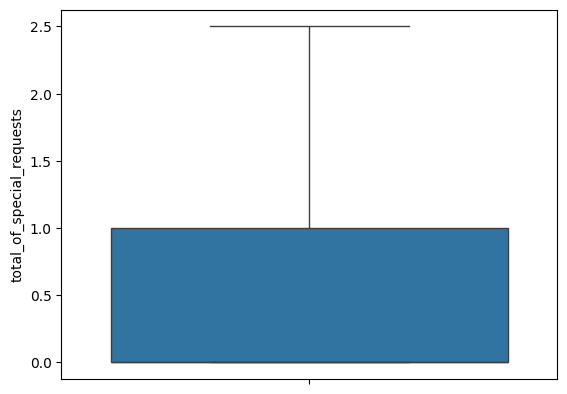

<Figure size 500x500 with 0 Axes>

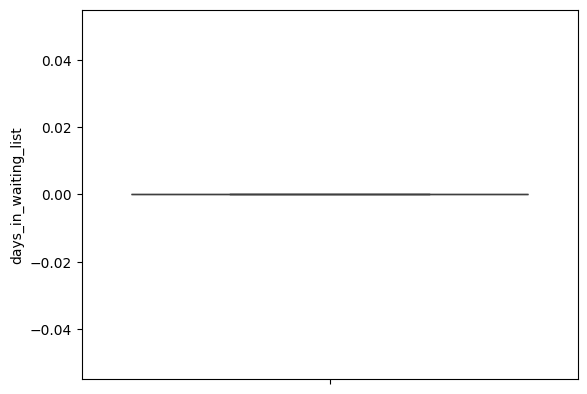

<Figure size 500x500 with 0 Axes>

In [ ]:

for i in new_outliers_columns:
  if df[i].dtype == 'object':
    continue
  sns.boxplot(df[i])
  plt.figure(figsize=(5, 5))
  plt.show()

* Outliers were identified in several variables, including lead time,
average daily rate (ADR), required car parking spaces, days in the waiting list, total children, total people, total stays, total special requests, and days in the waiting list. These outliers were initially detected using scatter plots and subsequently confirmed through quartile analysis.


* To address these outliers, an interquartile range (IQR) method was applied to identify and remove data points that deviated significantly from the expected distribution. This approach was particularly effective for variables with skewed distributions.

In [ ]:
df.head()

hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel   Cancelled      294.5               2021               July   
1  Resort Hotel   Cancelled      294.5               2021               July   
2  Resort Hotel   Cancelled        7.0               2021               July   
3  Resort Hotel   Cancelled       13.0               2021               July   
4  Resort Hotel   Cancelled       14.0               2021               July   

   arrival_date_week_number  arrival_date_day_of_month meal country  \
0                        27                          1   BB     PRT   
1                        27                          1   BB     PRT   
2                        27                          1   BB     GBR   
3                        27                          1   BB     GBR   
4                        27                          1   BB     GBR   

  market_segment  ... required_car_parking_spaces  total_of_special_requests  \
0         Direct  ...                           0                        0.0   
1         Direct  ...                           0                        0.0   
2         Direct  ...                           0                        0.0   
3      Corporate  ...                           0                        0.0   
4      Online TA  ...                           0                        1.0   

   reservation_status  reservation_status_date total_stays total_people  \
0           Check-Out               2015-07-01         0.0          2.0   
1           Check-Out               2015-07-01         0.0          2.0   
2           Check-Out               2015-07-02         1.0          2.0   
3           Check-Out               2015-07-02         1.0          2.0   
4           Check-Out               2015-07-03         2.0          2.0   

   total_childrens reserved_room_assigned  lead_time_category  guest_category  
0              0.0                    yes                high          couple  
1              0.0                    yes                high          couple  
2              0.0                     no                 low          single  
3              0.0                    yes                 low          single  
4              0.0                    yes                 low          couple  

[5 rows x 32 columns]

In [ ]:
# Checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86940 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86940 non-null  object        
 1   is_canceled                     86940 non-null  object        
 2   lead_time                       86940 non-null  float64       
 3   arrival_date_year               86940 non-null  int64         
 4   arrival_date_month              86940 non-null  object        
 5   arrival_date_week_number        86940 non-null  int64         
 6   arrival_date_day_of_month       86940 non-null  int64         
 7   meal                            86940 non-null  object        
 8   country                         86940 non-null  object        
 9   market_segment                  86940 non-null  object        
 10  distribution_channel            86940 non-null  object        
 11  is_rep

In [ ]:
# Coverting datatype of variables total_people and total_childrens to int64 from float64
df['total_people']=df['total_people'].astype('int64')
df['total_childrens']=df['total_childrens'].astype('int64')

In [ ]:
# For EDA Evaluating the unique value in each column
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          296
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
meal                                 5
country                             36
market_segment                       7
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
days_in_waiting_list                 1
customer_type                        4
adr                               8140
required_car_parking_spaces          1
total_of_special_requests            4
reservation_status                   3
reservation_status_date            926
total_stays                         11
total_people                         1
total_childrens                      1
reserved_room_assigned               2
lead_time_category                   3
guest_category                       3
dtype: int64

##EDA
Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

### Univariate Analysis of Numerical and Categorical Features

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

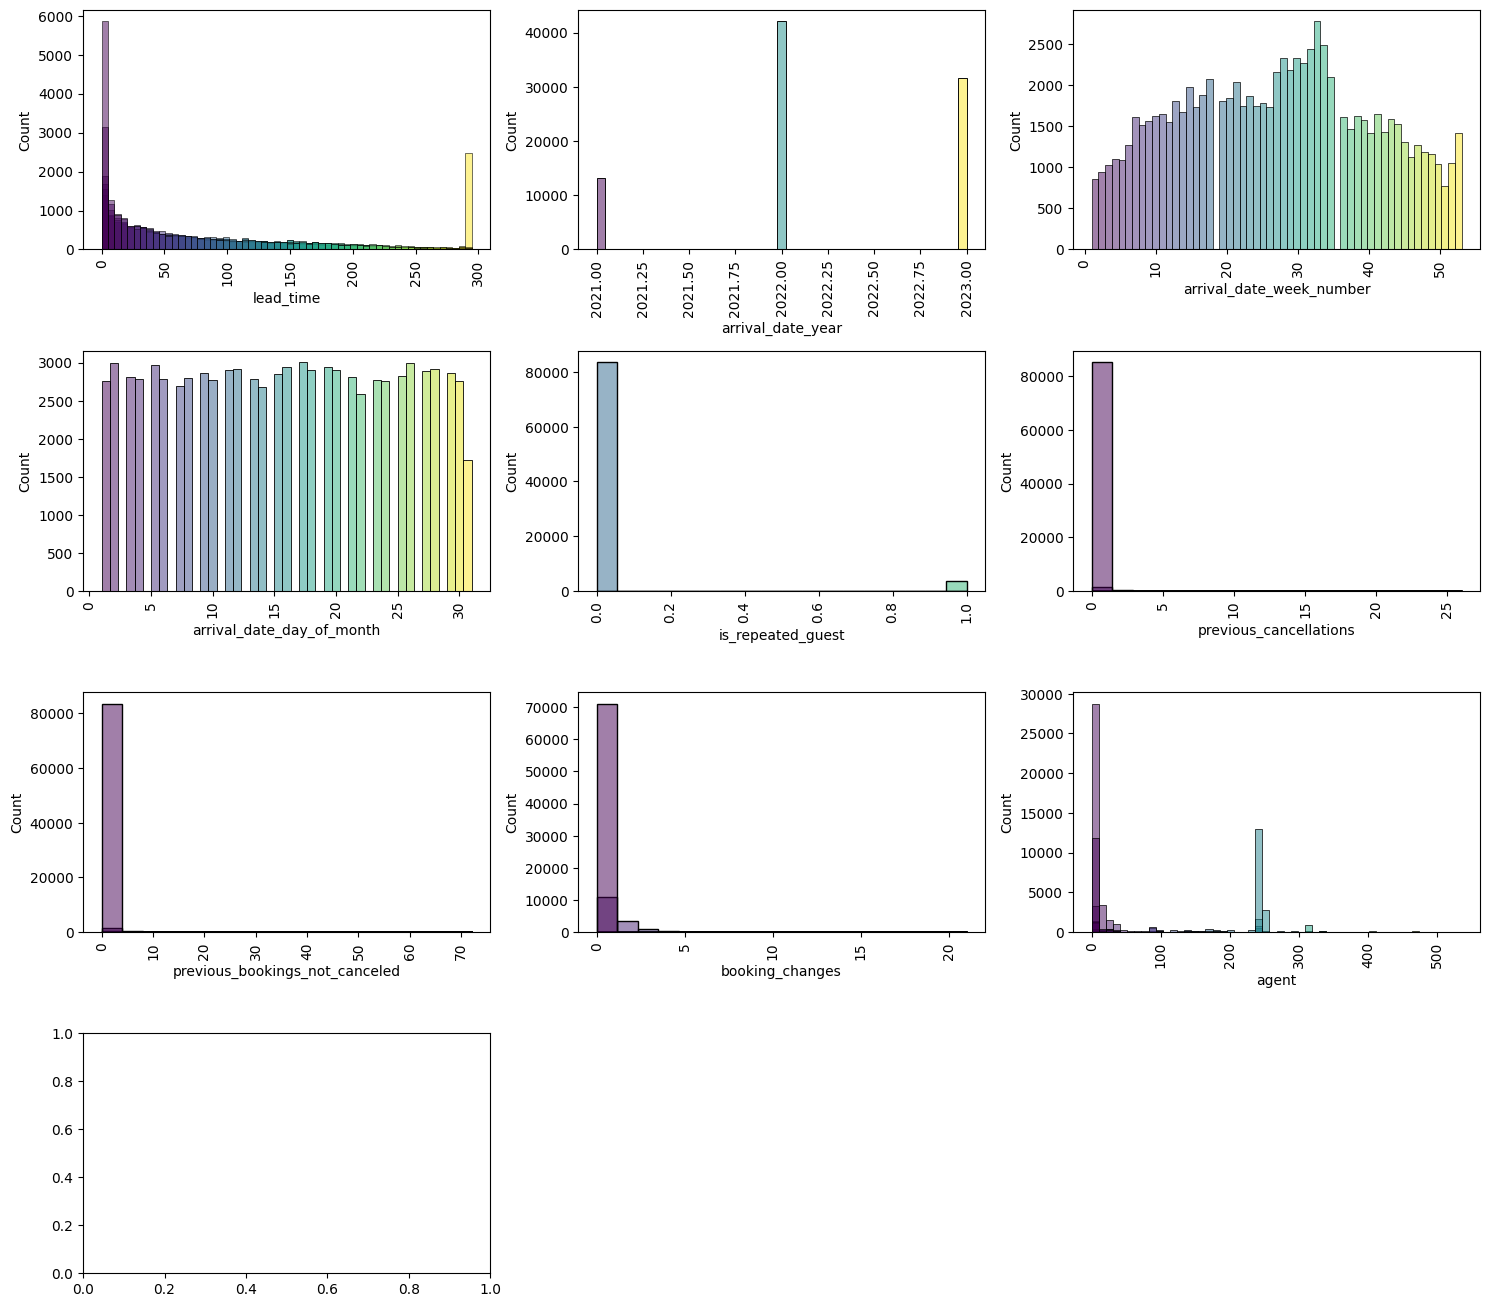

In [ ]:
#Numerical Features
plt.figure (figsize=(15,30))
numeric_features= [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(len(numeric_features)):
    plt.subplot(9,3,i+1)
    sns.histplot(kde=True,hue=df[numeric_features[i]], palette='viridis', legend=False, x = df[numeric_features[i]])
    plt.xticks(rotation = 90)
    plt.tight_layout()

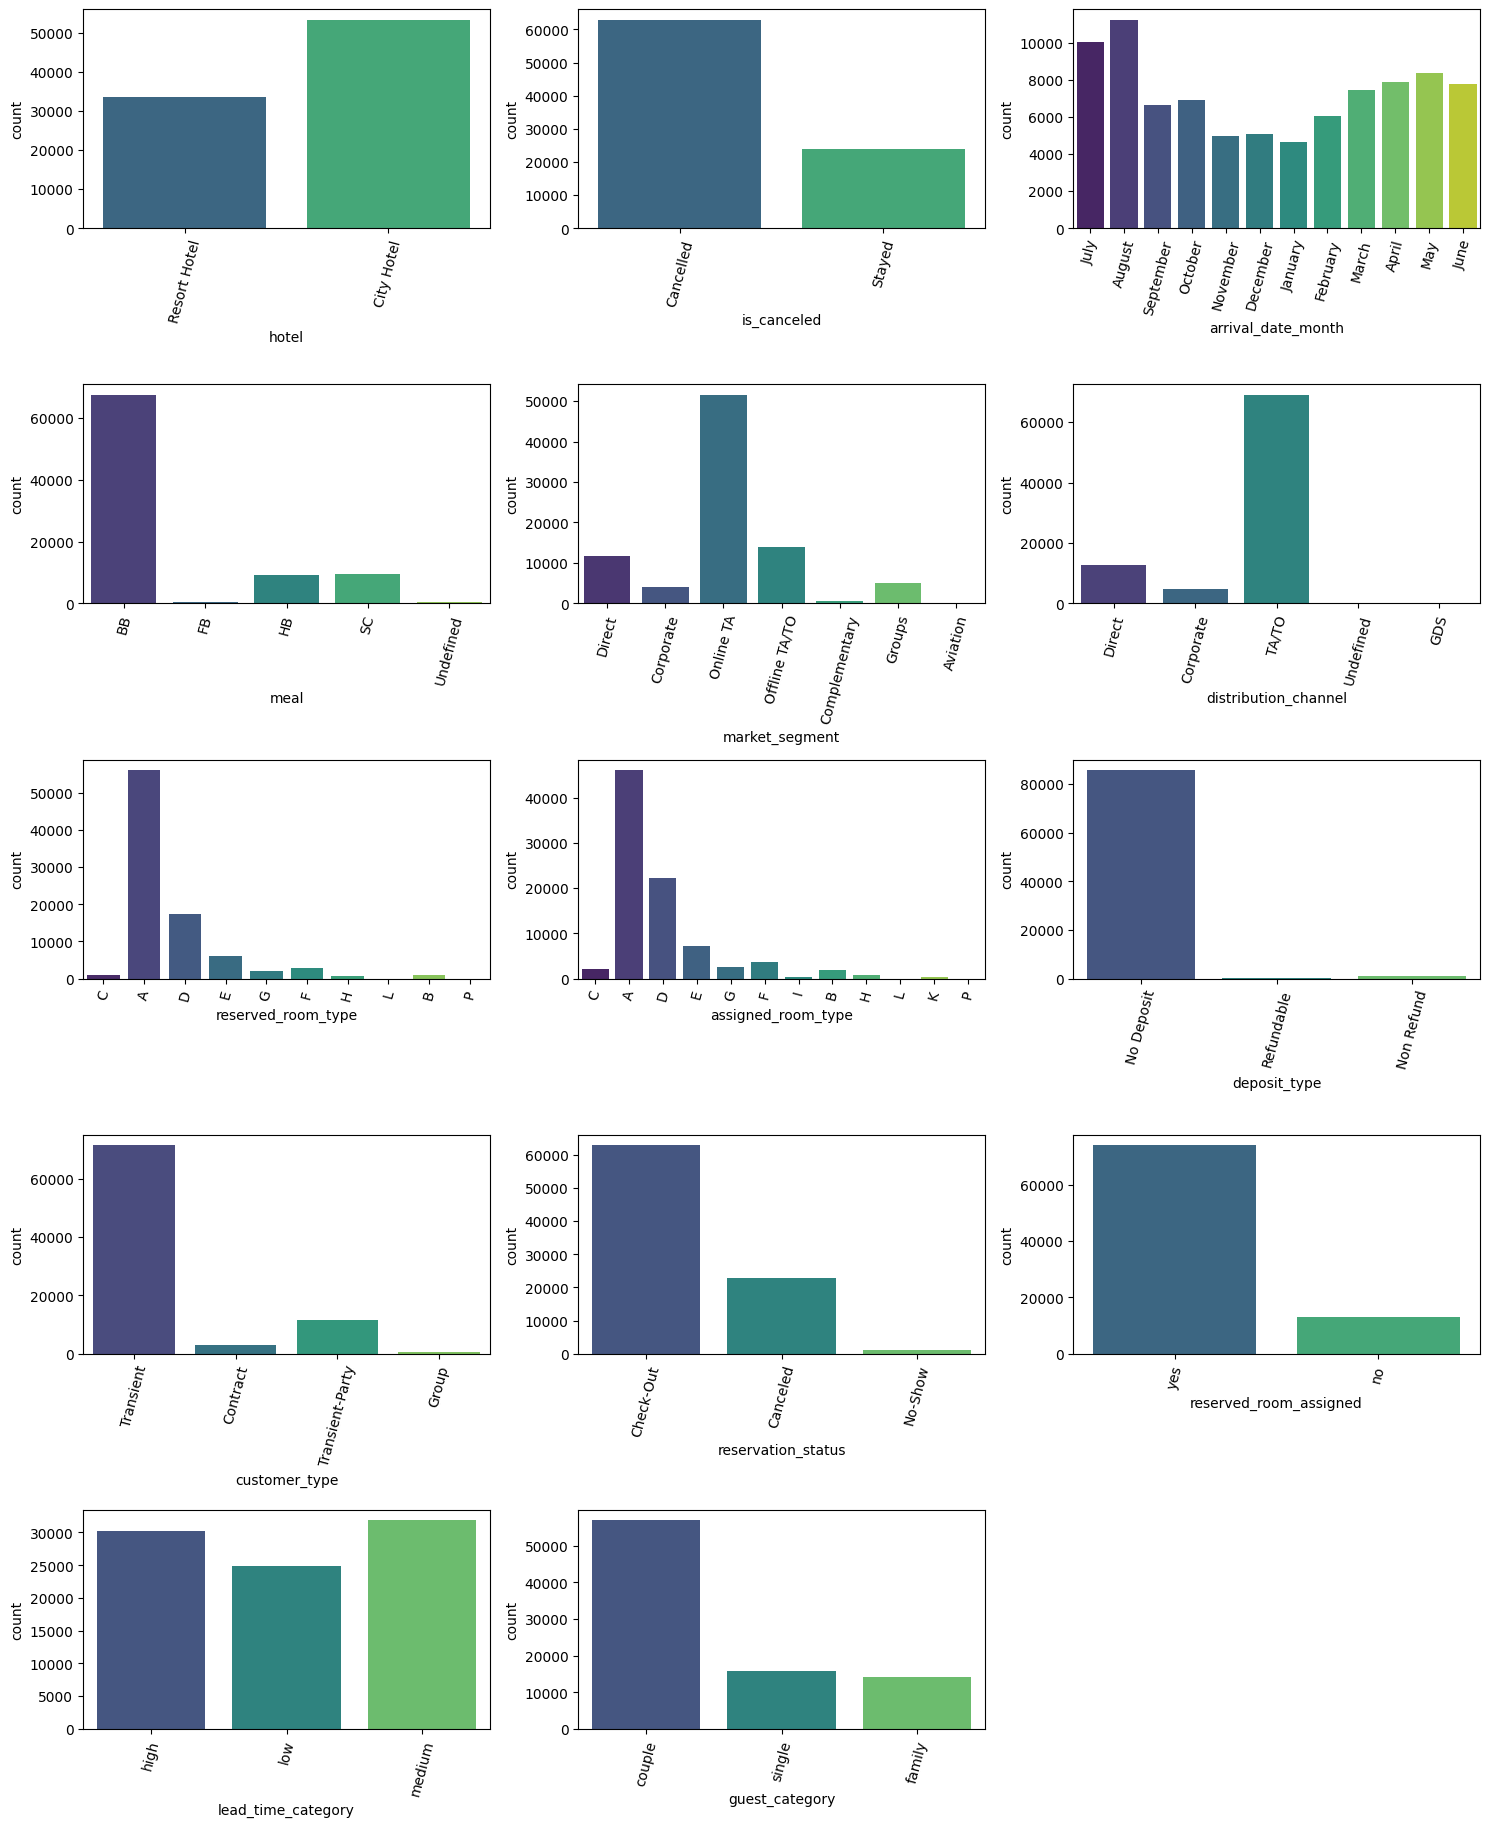

In [ ]:
# Categorical Features

plt.figure (figsize=(15,25))
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature!= 'country']
for j in range(len(categorical_features)):
    plt.subplot(7,3,j+1)
    sns.countplot( x = df[categorical_features[j]],hue=df[categorical_features[j]], palette='viridis', legend=False)
    plt.xticks(rotation=75)
    plt.tight_layout()

### Bivariate analysis


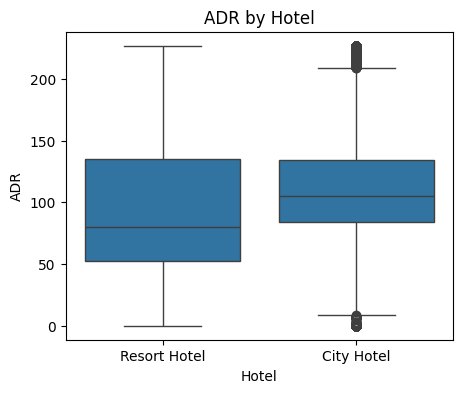

In [ ]:
# Average Daily Rate (ADR) by hotel
plt.figure(figsize=(5, 4))
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('ADR by Hotel')
plt.xlabel('Hotel')
plt.ylabel('ADR')
plt.show()

Average ADR seems to be between 50 and 140

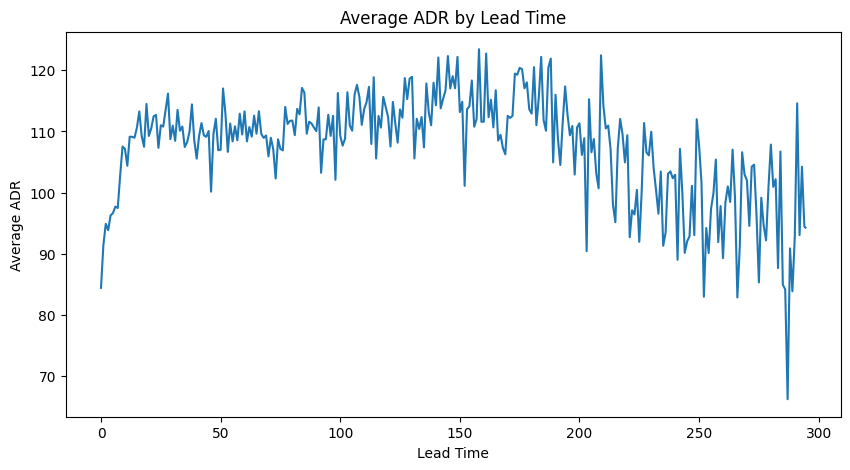

In [ ]:
# Calculating average ADR for each lead time
df_average_adr = df.groupby('lead_time')['adr'].mean()

plt.figure(figsize=(10,5))
plt.plot(df_average_adr.index, df_average_adr.values)
plt.xlabel('Lead Time')
plt.ylabel('Average ADR')
plt.title('Average ADR by Lead Time')
plt.show()

There is no realtion between lead time and adr as shown above in line plot.

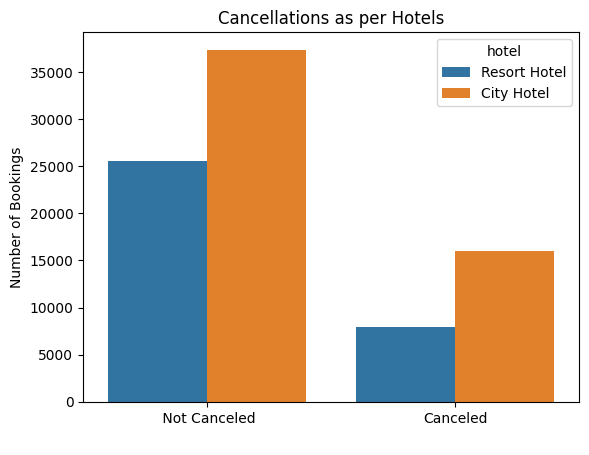

In [ ]:
# Cancellations as per Hotels
sns.countplot(x=df["is_canceled"],hue=df["hotel"])
plt.title("Cancellations as per Hotels")
plt.xticks(ticks=[0,1],labels=[" Not Canceled","Canceled"])
plt.xlabel(" ")
plt.ylabel("Number of Bookings")
plt.show()

"City hotels experienced significantly more cancellations than Resort hotels. While the combined average cancellation rate for both hotel types  has a higher rate. In contrast, Resort hotels had a lower cancellation rate."

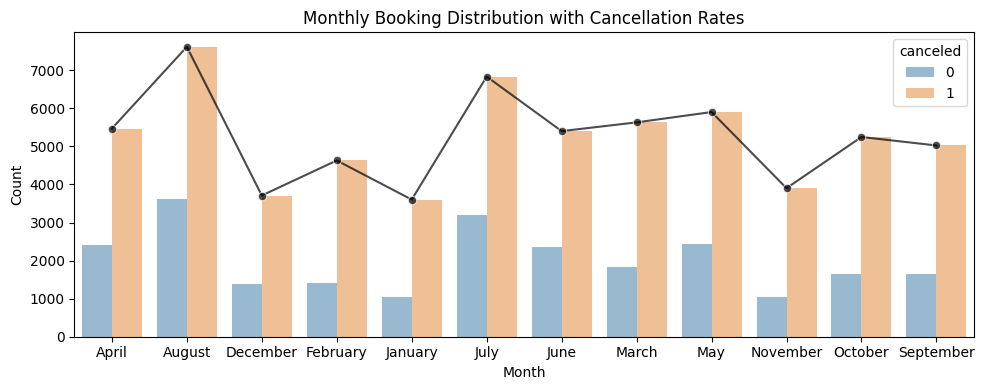

In [ ]:
# Create a 'canceled' column based on 'is_canceled'
df['canceled'] = df['is_canceled'].apply(lambda x: 1 if x == 'Cancelled' else 0)

# Calculating monthly cancellations
monthly_cancellations = df.groupby('arrival_date_month')['canceled'].sum().reset_index()

# Creating a figure with a single subplot
fig, ax = plt.subplots(figsize=(10,4))

# Plot monthly cancellation rate with transparency
sns.lineplot(x='arrival_date_month', y='canceled', data=monthly_cancellations, marker='o', color="black", alpha=0.7, ax=ax)  # Setting alpha for transparency

# Plot monthly booking distribution on top with transparency
sns.countplot(x='arrival_date_month', data=df, hue='canceled', ax=ax, alpha=0.5)  # Use hue for coloring by 'canceled'

# Adjust x-axis labels and title
ax.set_title('Monthly Booking Distribution with Cancellation Rates')
ax.set_xlabel('Month')
ax.set_ylabel('Count')  # Use a generic label for overlapping plots


# Adjust legend position (optional)
#ax.legend(loc='upper left')  # Adjust legend placement as needed

plt.tight_layout()  # Adjust spacing

plt.show()

We can clearly see that the cancellation rate is higher than the booking rate

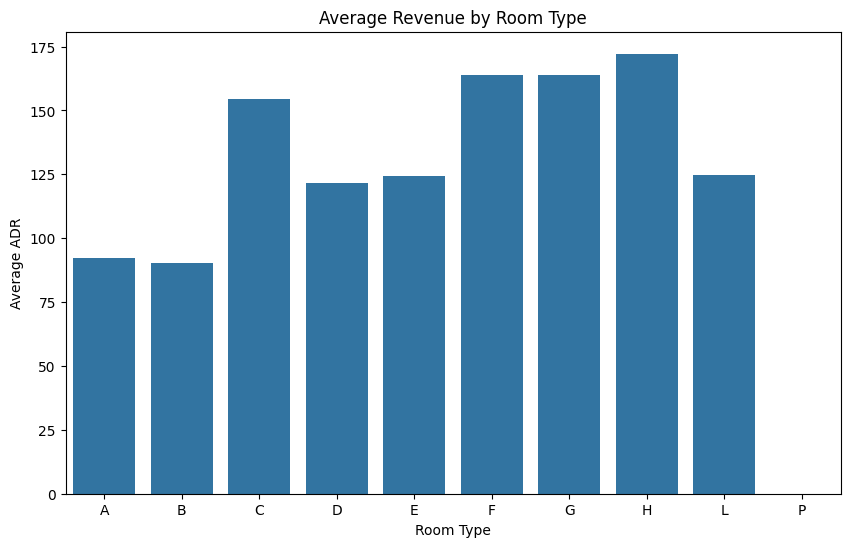

In [ ]:
# Revenue by room type
plt.figure(figsize=(10, 6))
room_type_revenue = df.groupby('reserved_room_type')['adr'].mean().reset_index()
sns.barplot(x='reserved_room_type', y='adr', data=room_type_revenue)
plt.title('Average Revenue by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average ADR')
plt.show()

G and H rooms generate higher ADR, contributing to higher revenue for city hotels.

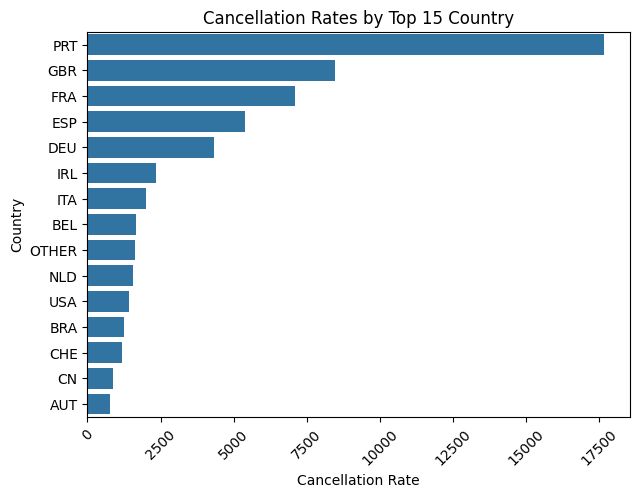

In [ ]:
# Cancellations by country
plt.figure(figsize=(7,5))
country_cancellations = df.groupby('country')['canceled'].sum().reset_index()
country_cancellations = country_cancellations.sort_values(by='canceled', ascending=False).head(15)
sns.barplot(x='canceled', y='country', data=country_cancellations)
plt.title('Cancellation Rates by Top 15 Country')
plt.xlabel('Cancellation Rate')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

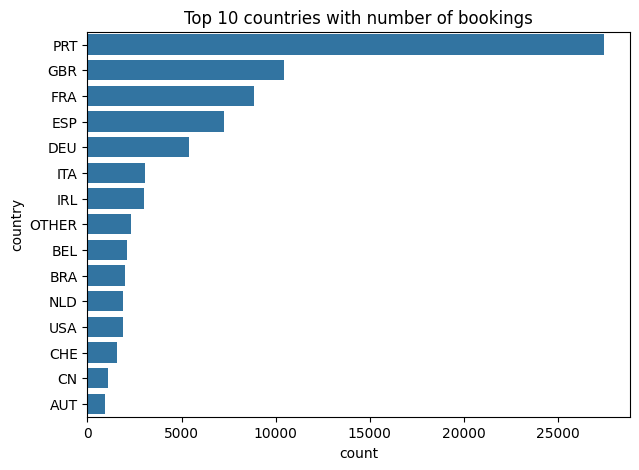

In [ ]:
# Number of bookings by each country
country_df = pd.DataFrame(df['country'].value_counts()).reset_index()

# Plotting point plot for country with number of bookings
plt.figure(figsize=(7,5))
ax=sns.barplot( x =country_df['count'], y=country_df['country'].head(15),)
ax.set_title('Top 10 countries with number of bookings')
plt.show()

PRT, GBR, FRA top 3 country by maximum booking and cancellation rate

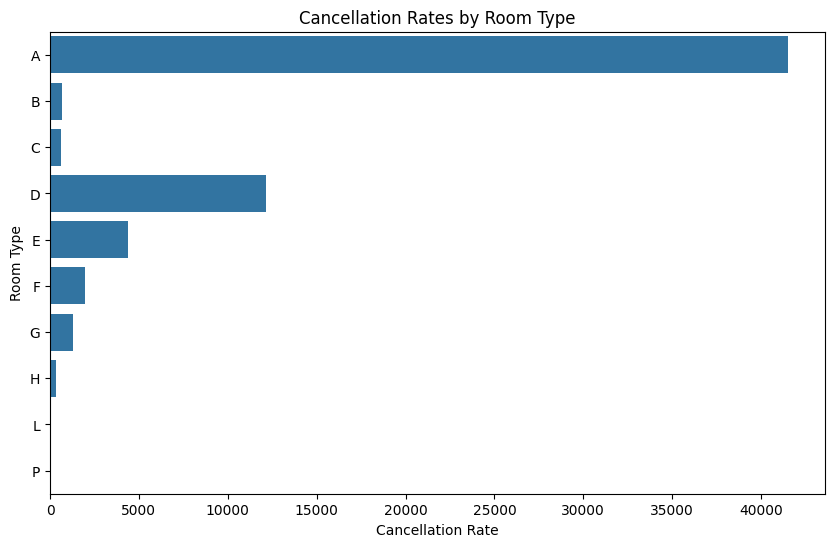

In [ ]:
# Cancellations by room type
plt.figure(figsize=(10, 6))
room_type_cancellations = df.groupby('reserved_room_type')['canceled'].sum().reset_index()
sns.barplot(x='canceled',y='reserved_room_type', data=room_type_cancellations)
plt.title('Cancellation Rates by Room Type')
plt.xlabel('Cancellation Rate')
plt.ylabel('Room Type')
plt.show()

A and D Room Type have maximum cancellation rate.

### Findings From EDA

* **Using the data we can clearly say that the average cancellation
percentage of our hotels is much higher than the industry average cancellation rate which is around 20 %. So, if this cancellation rate continues or increases in the future this will lead to major problems for the hotels**

* **Customer Preference**: City hotels are preferred over resort hotels.
* **Cancellation Rate**: Cancellations are high, especially in the TA/TO distribution channel.
* **Customer Origin**: Most customers are from the online TA market segment.
* **Customer Type:** Transient customers are the majority.
* **Lead Time:** A lead time of 50 is common.
* **ADR:** Average ADR is between 50 and 150, with higher rates for room types C, F, G, H.
* **Booking Duration:** Resort hotels have longer booking durations.
* **Seasonality:** Cancellations are lower in November to February.
* **Room Type:** A and D rooms have higher cancellation rates.
* **Reserved Room:** Cancellations are not significantly related to assigned rooms.
* **Lead Time and Stay:** Medium to high lead times correlate with longer stays.
* **Customer Category:** City hotels are preferred by most customer categories.
* **Distribution Channel:** TA/TO distribution has higher cancellations, while Direct, Corporate, and GDS have lower cancellations.
* **Room Type and Revenue:** G and H rooms generate higher ADR, contributing to higher revenue for city hotels.
* **Seasonality and Revenue:** City hotels perform better in May, September, and October, while resort hotels perform well in October and December.
* **Revenue Generation:** City hotels generate more revenue overall, and transient customers contribute significantly.
* **Parking:** Few customers require parking, with most preferring none.
* **Country Origin:** PRT, GBR, and FRA have the highest booking volume and cancellation rates.
* **Agent Performance:** Agent numbers 9 and 240 have made the most bookings.
* **Waiting Days:** Waiting days do not significantly impact cancellations.

# Ml Models


In [ ]:
#Importing Libraries that are likely to be used.

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,FunctionTransformer,StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.decomposition import PCA


In [ ]:
# creating new Data Frame
new_df = df

columns_to_drop = ['meal','canceled' ,'adr','reservation_status_date','agent','total_childrens','days_in_waiting_list', 'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month' ]
df_azure = new_df.drop(columns = columns_to_drop)
y = df['adr']
x= df_azure


# Understanding Customer Segmentation with Machine Learning

Customer Segmentation is the process of dividing customers into distinct groups based on shared characteristics. This helps businesses tailor their marketing and product strategies to specific customer needs, leading to increased customer satisfaction and revenue.

#  Using Column Transformer for Encodings

In [ ]:
#Using column transformers for encoding.

clm_trf = ColumnTransformer(transformers = [
    ('Ordinal encoder',OrdinalEncoder(),[0,1,7,20]),
    ("one Hot",OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,21,22]),
    ('Scaling' , StandardScaler(), [2])
],remainder='passthrough')

x = clm_trf.fit_transform(x)
cols = clm_trf.get_feature_names_out()

* -- Scaled columns with ordinal encoding where no relation was present in the data.
* -- Columns with related categorical values were encoded using one-hot encoding.
* -- Remaining features were scaled using StandardScaler.

### Splitting Train - Test Data

In [ ]:
#Train Test Split
xtrain,xtest ,ytrain,ytest =train_test_split(x,y, test_size=0.2,random_state=5)

In [ ]:
# Using Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
print(r2_score(ytest,rf.predict(xtest)))
print(mean_absolute_error(ytest,rf.predict(xtest)))

0.752742893182542
16.294428144470363


In [ ]:
print(r2_score(ytrain,rf.predict(xtrain)))

0.9624055296797284


The model we build is giving very ***high accuracy*** and also ***MAE is very low*** but this condition is not good It might be a case of ***Overfitting*** which we need to look into by applying Cross validation on top of it

In [ ]:
#Hyperparameter tuning and Cross Validation

params=[{"min_samples_split":[2]}]
gsv = GridSearchCV(rf,param_grid=params,scoring = 'r2',cv= 2,  n_jobs=-1)
gsv.fit (xtrain,ytrain)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'min_samples_split': [2]}], scoring='r2')

In [ ]:
gsv.cv_results_

{'mean_fit_time': array([174.5447489]),
 'std_fit_time': array([0.78343809]),
 'mean_score_time': array([2.75710905]),
 'std_score_time': array([0.21588457]),
 'param_min_samples_split': masked_array(data=[2],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_split': 2}],
 'split0_test_score': array([0.73393196]),
 'split1_test_score': array([0.72785872]),
 'mean_test_score': array([0.73089534]),
 'std_test_score': array([0.00303662]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
rf = RandomForestRegressor(max_depth=9, min_samples_split=10)
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=9, min_samples_split=10)

In [ ]:
print(r2_score(ytest,rf.predict(xtest)))
print(mean_absolute_error(ytest,rf.predict(xtest)))

0.6551063082011681
20.98309728462362


## Pricing Drivers Identification

In [ ]:
feature_import =dict(zip(cols,rf.feature_importances_))
feature_import = feature_import.items()

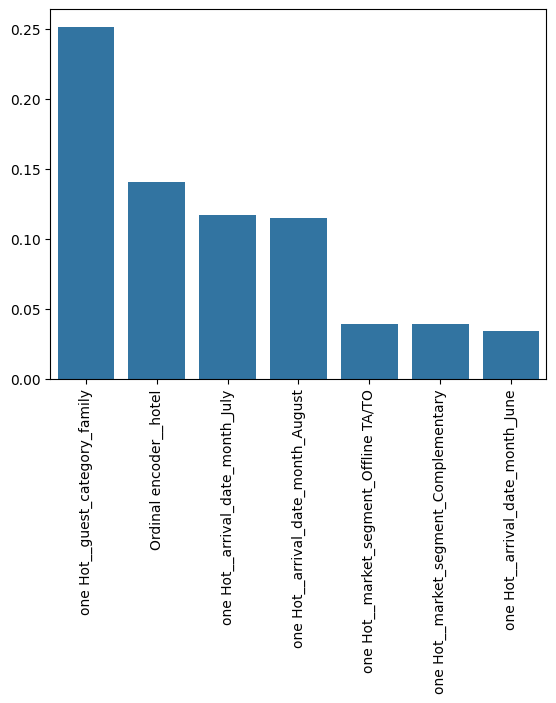

In [ ]:
values= dict(sorted(feature_import,key = lambda x: x[1],reverse=True)[0:7])
x= list(values.keys())
y = list(values.values())
sns.barplot(x=x,y=y)
plt.xticks(rotation = 'vertical')
plt.show()

#  Customer Segmentation using **K-Means**: + **PCA**

In [ ]:
cluster_df = df_azure
cluster_df=cluster_df[['lead_time','is_repeated_guest',  'booking_changes','total_stays']]

In [ ]:
# # Create a ColumnTransformer to apply one-hot encoding and standardization

Ct1 = ColumnTransformer(transformers = [
    ("one Hot",OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'),[1,2,3]),
    ('scaler',StandardScaler(),[0])
],remainder='passthrough')
# Fit and transform the data using the ColumnTransformer
X = Ct1.fit_transform(cluster_df)
# Convert the transformed data into a pandas DataFrame
X = pd.DataFrame(data =X ,columns = Ct1.get_feature_names_out())
# Droped rows with missing values
X.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'Number of Clusters')

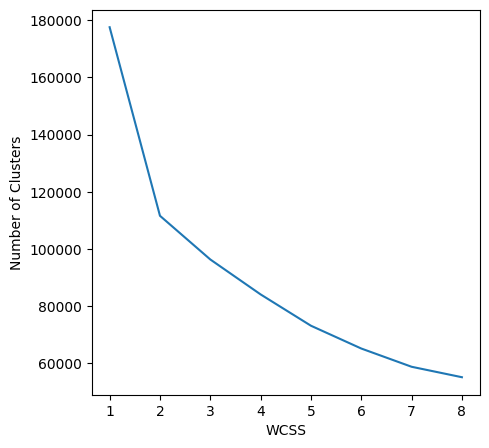

In [ ]:
wcss = []

for i in range (1,9):
    model = KMeans(n_clusters= i , random_state=99)
    model.fit(X)
    wcss .append(model.inertia_)

plt.figure(figsize=(5,5))
sns.lineplot(y= wcss, x = np.arange(1,9))
plt.xlabel("WCSS")
plt.ylabel("Number of Clusters")

In [ ]:
model = KMeans(n_clusters=3)
Y = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pcadf = pd.DataFrame(principal_components,columns = ['PC1','PC2'])

In [ ]:
model = KMeans(n_clusters=3)
Y = model.fit_predict(pcadf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='PC1', ylabel='PC2'>

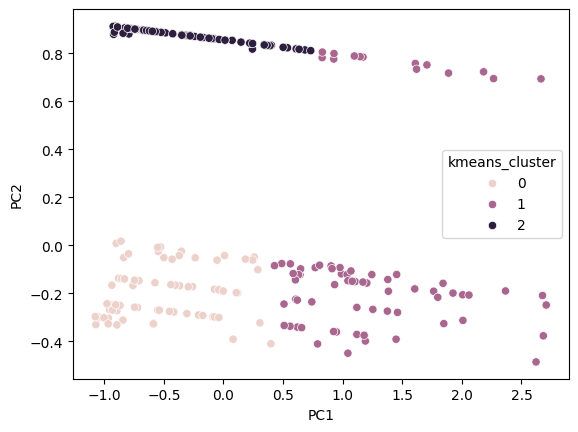

In [ ]:
pcadf['kmeans_cluster']= Y

sample = pcadf.groupby('kmeans_cluster').apply (lambda x : x.sample(80).reset_index(drop=True))

sns.scatterplot(data=sample,x='PC1',y='PC2',hue='kmeans_cluster',)

### Customer Segments
**Loyal Customers**


**Profile:**
 These customers are the backbone of your hotel business. They frequently return, rarely cancel, and often book directly or through corporate contracts. They value personalized service and are willing to pay a premium for it.
**Characteristics:**
High average daily rate (ADR), few booking changes, longer lead times, frequent special requests, and high satisfaction.


**Last-Minute Bookers**


**Profile:** These customers are spontaneous and flexible, often booking close to their arrival date. They may use travel agents or online platforms and prefer shorter stays, especially on weekends.

**Characteristics:** Short lead times, medium to high ADR, frequent booking changes, and preference for weekend stays.


**Budget Travelers**


**Profile:** Price-conscious customers who prioritize affordability. They often choose refundable or no-deposit options and are more likely to cancel or modify their bookings.
**Characteristics:** Low ADR, high cancellation rate, bookings made through third-party websites, and shorter stays.

#  Price Optimization
Determining optimal prices to maximize revenue and profitability.

In [ ]:
#Creating a function to calculate the parameters for different models
def get_metrics(ytest, y_predict, model_name):
    MSE = mean_squared_error(ytest,y_predict)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(ytest,y_predict)
    R2_Score = r2_score(ytest,y_predict)

    print(f"Model Name : {model_name},\n MSE : {round(MSE,3)},\n RMSE :{round(RMSE,3)},\n MAE :{round(MAE,3)},\n R2 Score : {round(R2_Score,3)}\n")

In [ ]:
lr = LinearRegression().fit(xtrain,ytrain)
y_pred_lr = lr.predict(xtest)

rfr = RandomForestRegressor().fit(xtrain, ytrain) #use bagging (ensmble)
y_pred_rfr = rfr.predict(xtest)

xgbr = XGBRegressor().fit(xtrain, ytrain) #use boosting(ensmble)
y_pred_rxgbr = xgbr.predict(xtest)

In [ ]:
get_metrics(ytest, y_pred_lr, "Linear Regression")
get_metrics(ytest, y_pred_rfr, "RandomForestRegressor")
get_metrics(ytest, y_pred_rxgbr, "XGBRegressor")

Model Name : Linear Regression,
 MSE : 950.098,
 RMSE :30.824,
 MAE :23.246,
 R2 Score : 0.605

Model Name : RandomForestRegressor,
 MSE : 592.105,
 RMSE :24.333,
 MAE :16.251,
 R2 Score : 0.754

Model Name : XGBRegressor,
 MSE : 587.41,
 RMSE :24.237,
 MAE :17.259,
 R2 Score : 0.756



# Pricing Strategy Development:

In [ ]:
df2 = df

# Drop irrelevant columns
columns_to_drop = ['is_canceled', 'reservation_status_date', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'market_segment', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 'assigned_room_type', 'agent']
data_cleaned = df2.drop(columns=columns_to_drop)
data_cleaned.head()

hotel  lead_time meal country distribution_channel  \
0  Resort Hotel      294.5   BB     PRT               Direct   
1  Resort Hotel      294.5   BB     PRT               Direct   
2  Resort Hotel        7.0   BB     GBR               Direct   
3  Resort Hotel       13.0   BB     GBR            Corporate   
4  Resort Hotel       14.0   BB     GBR                TA/TO   

   is_repeated_guest reserved_room_type deposit_type customer_type   adr  \
0                  0                  C   No Deposit     Transient   0.0   
1                  0                  C   No Deposit     Transient   0.0   
2                  0                  A   No Deposit     Transient  75.0   
3                  0                  A   No Deposit     Transient  75.0   
4                  0                  A   No Deposit     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests reservation_status  \
0                            0                        0.0          Check-Out   
1                            0                        0.0          Check-Out   
2                            0                        0.0          Check-Out   
3                            0                        0.0          Check-Out   
4                            0                        1.0          Check-Out   

   total_stays  total_people  total_childrens reserved_room_assigned  \
0          0.0             2                0                    yes   
1          0.0             2                0                    yes   
2          1.0             2                0                     no   
3          1.0             2                0                    yes   
4          2.0             2                0                    yes   

  lead_time_category guest_category  canceled  
0               high         couple         1  
1               high         couple         1  
2                low         single         1  
3                low         single         1  
4                low         couple         1

In [ ]:
# Handle categorical variables
categorical_features = data_cleaned.select_dtypes(include=['object']).columns
for feature in categorical_features:
    data_cleaned[feature] = LabelEncoder().fit_transform(data_cleaned[feature])

In [ ]:
# Define features and target
X = data_cleaned.drop('adr', axis=1)
y = data_cleaned['adr']

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top features
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature indices
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['hotel', 'country', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'total_of_special_requests', 'reservation_status',
       'total_stays', 'reserved_room_assigned', 'canceled'],
      dtype='object')


## Model 1: Linear Regression

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Evaluate model
print("Linear Regression Coefficients:", lin_reg.coef_)

Linear Regression Coefficients: [-9.43631901 -1.75461892  0.45797894 -5.61094601 20.29759301  6.23155906
 -3.0937156   0.7750825   2.93864434 -2.10253195]


In [ ]:
# Test the model on the test data
y_pred = lin_reg.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1778.6414778964297
R-squared: 0.26047131210810304


## Model 2: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Ridge Regression
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='r2', cv=5, n_jobs=-1)

# Fit Ridge model
grid_search_ridge.fit(X_train, y_train)
print("Best Parameters for Ridge Regression:", grid_search_ridge.best_params_)
print("Best Ridge Model Score:", grid_search_ridge.best_score_)

Best Parameters for Ridge Regression: {'alpha': 100}
Best Ridge Model Score: 0.26216807057717123


In [ ]:
# Test the model on the test data
y_pred = grid_search_ridge.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1778.663240198018
R-squared: 0.26046226371552983


## Model 3: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='r2', cv=5, n_jobs=-1)

# Fit Random Forest model
grid_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest Regressor:", grid_search_rf.best_params_)
print("Best Random Forest Model Score:", grid_search_rf.best_score_)

Best Parameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Model Score: 0.3941342642227341


In [ ]:
# Test the model on the test data
y_pred = grid_search_rf.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1471.895194892688
R-squared: 0.3880111671067409


Model Evaluation

In [ ]:
print("Linear Regression R^2 Score:", lin_reg.score(X_selected, y))
print("Best Ridge Regression R^2 Score:", grid_search_ridge.best_score_)
print("Best Random Forest Regressor R^2 Score:", grid_search_rf.best_score_)

Linear Regression R^2 Score: 0.2621566463543761
Best Ridge Regression R^2 Score: 0.26216807057717123
Best Random Forest Regressor R^2 Score: 0.3941342642227341


# Findings

### Findings From EDA

* **Using the data we can clearly say that the average cancellation
percentage of our hotels is much higher than the industry average cancellation rate which is around 20 %. So, if this cancellation rate continues or increases in the future this will lead to major problems for the hotels**

* **Customer Preference**: City hotels are preferred over resort hotels.
* **Cancellation Rate**: Cancellations are high, especially in the TA/TO distribution channel.
* **Customer Origin**: Most customers are from the online TA market segment.
* **Customer Type:** Transient customers are the majority.
* **Lead Time:** A lead time of 50 is common.
* **ADR:** Average ADR is between 50 and 150, with higher rates for room types C, F, G, H.
* **Booking Duration:** Resort hotels have longer booking durations.
* **Seasonality:** Cancellations are lower in November to February.
* **Room Type:** A and D rooms have higher cancellation rates.
* **Reserved Room:** Cancellations are not significantly related to assigned rooms.
* **Lead Time and Stay:** Medium to high lead times correlate with longer stays.
* **Customer Category:** City hotels are preferred by most customer categories.
* **Distribution Channel:** TA/TO distribution has higher cancellations, while Direct, Corporate, and GDS have lower cancellations.
* **Room Type and Revenue:** G and H rooms generate higher ADR, contributing to higher revenue for city hotels.
* **Seasonality and Revenue:** City hotels perform better in May, September, and October, while resort hotels perform well in October and December.
* **Revenue Generation:** City hotels generate more revenue overall, and transient customers contribute significantly.
* **Parking:** Few customers require parking, with most preferring none.
* **Country Origin:** PRT, GBR, and FRA have the highest booking volume and cancellation rates.
* **Agent Performance:** Agent numbers 9 and 240 have made the most bookings.
* **Waiting Days:** Waiting days do not significantly impact cancellations.


### Findings From ML Models

Created 3 ML models  and evaluated which model perform best.

Pricing Drivers Identification:- Random Forest model perform best as three models

Customer Segment Analysis:- kmeans clustring model perform best as models

Pricing Strategy Development:- XG Boost model perform best as models

# **Conclusion:**
* Effective segmentation and pricing strategies can significantly enhance Azure Hotels’ profitability.

* The identified pricing drivers should guide dynamic pricing models.

* By focusing on reducing cancellations and optimizing high-demand rooms, the overall revenue is expected to increase.


### Next Steps:

* Deploy machine learning models for real-time pricing in a production environment.

* Continuously monitor and adjust pricing models based on customer behavior and demand trends.

* Implement a customer feedback loop to refine pricing strategies.


#                                                   **THANK YOU**